이번 분석은 현재 아주의대 유희석병원장이 이국종의사에게 욕설한 것 때문에 유희석병원장의 의료원장을 퇴진 요구한다는 네이버뉴스이용자들의 답글을 분석해 본다.  
이용자들을 현재 이 사태에 대해 어떻게 생각하고 있을까? 과연 이용자들도 유희석이 잘못했다 생각하는가? 아니면 유희석병원장의 욕설에 대해 동의 하는가?

In [1]:
#필요한 package들 로드하기
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import random
from random import sample
pd.set_option('display.max_colwidth',-1)
pd.options.display.max_columns = None
pd.options.display.max_rows = None

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#한글폰트 설정
plt.rc("font",family="Malgun Gothic")

#크롤링한 파일 로드하기
df = pd.read_excel("C:/Users/munsu/PycharmProjects/untitled/news.xlsx", sheet_name='이국종')
df.shape

(352, 4)

In [2]:
df.head()

,Unnamed: 0,작성자,날짜,내용
0,0,eisl****,2020.01.17. 15:51,"객관적으로 기사를 참 잘 쓰셨네요. 기사는 이렇게 쓰는거다라는 모범답안입니다. 어떤 기사를 보면 뽀찌를 받았다는 냄새가 풀풀나는데, 어느편에도 서지 않고 정확하게 객관적인 상황을 전달하셨습니다."
1,1,lazy****,2020.01.17. 16:12,"국가가 지원금을 민간병원에 줘서 운영하려고 한게 잘못이다. 외주 주려 하지말고, 국가가 직접 중증외상센터 같은 기관을 운영해야 한다."
2,2,skb_****,2020.01.17. 15:55,의사들 중에 이국종 욕하는 사람들 엄청 많아요 ㅋㅋ 그들은 국민이 돈으로 보이겠죠 사명감 그딴거 1도 없어요.
3,3,phoo****,2020.01.17. 16:00,힘내세요 이교수님
4,4,hano****,2020.01.17. 16:01,의사한테 욕설할정도면 환자들은 그냥돈으로만 생각했겠네


# 데이터 전처리
네트워크 오휴 등으로 발생한 중복 입렵 값을 제거  
    빈도 수 중복을 방지하기 위해

In [3]:
print(df.shape)
df = df.drop_duplicates(["내용"], keep = "last")
print(df.shape)

(352, 4)
(352, 4)


# 띄어 쓰기를 제거한 텍스트에서 키워드 추출

In [4]:
# 이 키워드을 각 column으로 따로 만들어 빈도수를 카운트 할 수 있다.
search_keyword = ['이국종','힘내세요','국민','국가','의사','돈',"진짜",'병원장',"유희석","전라도"]

for keyword in search_keyword:
    df[keyword] = df["내용"].str.contains(keyword)

In [5]:
df[search_keyword].sum().sort_values(ascending=False)

이국종     95
돈       52
의사      52
국민      23
병원장     21
국가      20
힘내세요    14
유희석     13
진짜      4 
전라도     1 
dtype: int64

In [6]:
# 몇 단어들을 찾아 보았더니 이국종이름이 총 352개의 답글에서 95개가 나왔다. 
df.head() # 처음 5개를 보니 첫 댓글을 빼고 다들 이국종의사를 응원한다던가 병원장과 병원에 대한 안좋은 의식이 보여지고 있다.

,Unnamed: 0,작성자,날짜,내용,이국종,힘내세요,국민,국가,의사,돈,진짜,병원장,유희석,전라도
0,0,eisl****,2020.01.17. 15:51,"객관적으로 기사를 참 잘 쓰셨네요. 기사는 이렇게 쓰는거다라는 모범답안입니다. 어떤 기사를 보면 뽀찌를 받았다는 냄새가 풀풀나는데, 어느편에도 서지 않고 정확하게 객관적인 상황을 전달하셨습니다.",False,False,False,False,False,False,False,False,False,False
1,1,lazy****,2020.01.17. 16:12,"국가가 지원금을 민간병원에 줘서 운영하려고 한게 잘못이다. 외주 주려 하지말고, 국가가 직접 중증외상센터 같은 기관을 운영해야 한다.",False,False,False,True,False,False,False,False,False,False
2,2,skb_****,2020.01.17. 15:55,의사들 중에 이국종 욕하는 사람들 엄청 많아요 ㅋㅋ 그들은 국민이 돈으로 보이겠죠 사명감 그딴거 1도 없어요.,True,False,True,False,True,True,False,False,False,False
3,3,phoo****,2020.01.17. 16:00,힘내세요 이교수님,False,True,False,False,False,False,False,False,False,False
4,4,hano****,2020.01.17. 16:01,의사한테 욕설할정도면 환자들은 그냥돈으로만 생각했겠네,False,False,False,False,True,True,False,False,False,False


In [7]:
df.tail() # 마지막 5개의 답글들을 보니 유희석병원장을 응원한다던가 이국종의사를 비하하고 있다

,Unnamed: 0,작성자,날짜,내용,이국종,힘내세요,국민,국가,의사,돈,진짜,병원장,유희석,전라도
347,347,triu****,2020.01.17. 18:20,엄청 무서운 사람임. 욕하도록 성질 도꿔 놓고 잘못했다고 피해자 코스프레한걸 녹취. 결정적 순간이 도래했을 때 핵탄 처럼 터트림. 일반 생각없는 민중들은 겉만 보고 순진하게 편들음. 원장이 순진하게 넘어간 사람임. 질 안좋은 정치인들 수법 연상되지 않는가? 제발 생각 좀 하고 살자. 그 사람 업적을 폄하하려고 하는 건 아님. 업적과 실력만 좋다고 만사 ok 인가.,False,False,False,False,False,False,False,False,False,False
348,348,jyju****,2020.01.17. 18:18,이 나라 참 이상하네 뭐든 감정으로 모든걸 대처하는데 이성이란건 찾아볼수가 없다 병원장이 밑에 사람한테 뭐라고 할수도 있고 욕을했어도 사회생활에서 빈번하게 있는거 아닌가 아무 이유 없이 그랬을까 잘못을 했으니 그랬겠지 지금 우리나라 사회전반에 문제가 심각하다 문머저리가 정권잡고 난후 뭐든 감정으로 일처리하는데 미처가는것 같다,False,False,False,False,False,False,False,True,False,False
349,349,stre****,2020.01.17. 18:02,이국종도 그릇이 참 작네. 5년전에 상사한테 욕좀 먹은걸 비겁하게 녹음해서 보관하면서 꽁해 있다가..이제서야 그걸 언론사에 쪼르르 달려가 꼰지르는 저의가 뭐냐? 국종아…절이 싫으면 중이 떠나면 될터..못해먹겠으면 나가라. 집에 가라. 그리고 5년전 사건은 공소시효 지났다. 법좀 배워라.,True,False,False,False,False,False,False,False,False,False
350,350,yssp****,2020.01.17. 17:59,이국종이 병원장도 고르는 구나 .좋겠네. 국종이,True,False,False,False,False,False,False,True,False,False
351,351,hib2****,2020.01.17. 17:59,병원장이면 정치 경제 사회 의료 모든것을 봐야 하는데 감정이나 의술만 따질수 있냐? 병원장 너무 뭐라 하지마라 그것도 몇년전 일 가지고....,False,False,False,False,False,False,False,True,False,False


In [8]:
# 그럼 과연 네이버뉴스이용자들은 병원장 퇴진 요구에 대해 반대하는 것인가 아니면 찬성하는것인가?
# random sampling으로 10개를 뽑아서 어떠한 생각인지 한번 더 보자
random.seed(1)
sample10 = sample(list(df['내용']), 10)
pd.DataFrame(sample10)

,0
0,그전에도 여러번 욕했다던데. 그거 다참고 지금까지 버틴것만으로도 암걸릴듯..
1,이분 다 좋은데 !이재명은 아니죠?!!!
2,그냥 이국종 원장으로 갑시다....직접 진료 수술할 시간은 줄어들겠지만그게 의료 인재양성의 지름길이다...
3,욕하는 것도 문제지만 욕 먹는 놈이 더 문제다. 욕의 90% 이상은 욕 먹는 놈 잘못이다.
4,조국같은넘들이 지금현대한민국요직을점령하고 있어서 생긴 현상이다.지들끼리끼리다해처먹으면서 겉으로는 공정.도덕.정의를 외치고 뒷로는온갖추익한짓으로 권력과부를 움켜쥐고있는 이들은 진보.좌파 인사들이다.이들이 점령한 관료.정치.관변단체.사회단체.언론.교육.사법부등 개인의능력을중시하는 사기업빼고는 전부분을 지들끼리 해처먹고있다.이런자들을 법적으로수사하려는 윤총장을 이들은조직적으로 방해하고있다.진정한 대한민국의 혁명과공정한 자유대한을 원한다면 윤총장이나.진중권같은 바른분들을 적극지지해야한다
5,원장이면 욕해도 되는거여?? 원장 짤러
6,1:1 은 어느 쌍욕을 햇던 고발 자체가 안된다던대 그간 경찰에서 고발 안해쥰건 뭐냐 ㅡㅡ?? 이런것더 내로남불이냐
7,잘 하세요. 욕을 할 정도면 왜 했는지 모르지만 서로 뭔가 문제가 있네요.
8,이국종 구하려면 나라가먼저 병원을 살리세요. 적자보는데 누가 지원합니까??
9,댓글에도 한심한사람들 많은데


random으로 돌려보니 새로운 류의 답글들이 보이기 시작한다. 2개의 정치글이 보이고 3개의 응원글이 있고 2개의 이국종의사가 문제라는 댓글이 있고 각 1개씩 나라문제와 댓글다는 사람을 한심하게 보는 댓글이 있다

In [9]:
# 원하는빈도수 카운트
df_python = df[df["내용"].str.contains("이국종|국민")].copy()
df_python.shape

(111, 14)

In [10]:
#정치댓글이 보이길래 과연 일베도 있는지 확인해 보았다. 기사와 전혀 관렵없는 지역감정을 만드는 일베 댓글이 있었다
text = df.loc[(df["전라도"] == True), "내용"]
for t in text:
    print("-"*200)
    print(t)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
원장이 전라도 맞나요?


# 빈도수 계산을 위한 텍스트 데이터 벡터화
    BOW (Bag of Words) 단어 가방에 단어를 토큰화 해서 담아준다

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word',
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             min_df = 2,
                             ngram_range =(1,6),
                             max_features = 2000
                             )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2000, min_df=2,
                ngram_range=(1, 6), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [12]:
feature_vector = vectorizer.fit_transform(df["내용"].values.astype('U'))
feature_vector.shape

(352, 510)

In [13]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

510


['1도', '5년전', '60억', 'ㅉㅉ', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅡㅡ', '가지고', '간다', '간호사들한테']

In [14]:
pd.DataFrame(feature_vector[:10].toarray(), columns=vocab).head()

,1도,5년전,60억,ㅉㅉ,ㅋㅋ,ㅋㅋㅋ,ㅡㅡ,가지고,간다,간호사들한테,같다,같은,같은데,같이,개인의,건강과,것도,것들,것이,겨우,결국,결국은,경영을,경영인,경영인 이전에,계속,고발,고발할,곳에,공산주의,과연,교수,교수가,교수는,교수님,교수님 힘내세요,교수님이,교수를,국가가,국가가 직접,국가에서,국립,국민,국민들,국민이,국종아,국종이,굳이,궁금하다,권역외상센터,그거,그걸,그것도,그게,그냥,그래도,그런,그런가,그런데,그렇게,그렇게 하는,그렇게 하는 나라가,그렇게 하는 나라가 아닌데,그리,그리고,그만두고,근데,기관을,기냥,기본,기사는,기사를,나가라,나는,나라,나라가,나라가 아닌데,나라꼴,나라로,나라에서,나라의,나랑,나랑 한판,나랑 한판 붙을래,나만,나서,남겨,낫지,내가,내부에서,너나,너무,녹음은,녹음은 누가,녹음해서,녹취,녹취를,놈들,놈이,누가,누구나,누구는,니가,니들은,니들이,다른,닥터,닥터헬기,당신,당신같은,당신같은 사람이,당신은,당연히,당장,대통령,대통령이,대학병원에,대한민국,대한민국에,도대체,돈만,돈보다,돈에,돈으로,돈으로 보는,돈을,돈이,돈이나,되고,되는,되지,된다,됩니다,뒤에,뒤에서,따지는,때려,때려쳐,때문에,떠나,떠나게,떠나고,떠나라,떠나면,떠나세요,뜻을,마냥,마라,마음,만드는,만든,만들어,만일,많으면,많은데,많이,말고,말을,말이,맞다고,맞아,먼저,모두,모든,목적이,몰라도,무슨,묵묵히,문제가,문제는,문제다,문제로,물론,뭐가,뭐냐,뭐라고,뭔가,민간병원에,민주당,밑에,바로,밖에,받아서,버리세요,벌써,별도,병원,병원도,병원들,병원은,병원을,병원의,병원이,병원장,병원장이,보고,보는,보면,보인다,보호하고,복지부의,본다,본질은,봐라,부터,붙어볼래,붙을래,비판하는,빨갱이,뿐이다,사과하고,사는,사람,사람도,사람들,사람들을,사람보다,사람으로,사람은,사람을,사람의,사람이,사명감,사회에서,산부인과,살리는,상사가,상황을,생각,생각하는,생각하면,생각합니다,생명을,서로,선서를,성형외과,세운,손실액은,솔직히,수도,수법,수준이,스스로,시민단체,시민단체가,시키고,심각하다,심지어,싶다,싶어서,쓰레기들,아냐,아는,아니고,아니길,아니냐,아니다,아니라,아니지,아닌,아닌가,아닌데,아님,아닙니다,아무,아무리,아예,아주,아주대,아주대병원,아주병원,아직도,아직도 자리,아직도 자리 지키고,안되는,안받고,안쓰고,안하고,안해주지,않나,않다고,않되나요,않으면,않은,않을까,양심도,양쪽,어느,어디,어떤,어떨지,어떻게,어이구,억지로,얼마,얼마나,엄청,없네,없는,없는 병원장,없다,없애고,없어,없을,없이,여긴,여론몰이,여실히,열심히,완전,외국으로,외상,외상센타,외상센터,외상센터가,외상센터는,외상센터를,욕도,욕설을,욕을,욕하는,우리,우리나라,우리나라는,운영,운영하고,운영하면,운영해야,원래,원래 그렇게,원래 그렇게 하는,원래 그렇게 하는 나라가,원래 그렇게 하는 나라가 아닌데,원장,원장도,원장아,원장으로,원장은,원장을,원장이,위해,유원장,유원장님,유희석,유희석 의료원장,유희석이,응원합니다,의료,의료수가를,의료원장,의료원장이,의사,의사가,의사는,의사들,의사들은,의사들이,의사로서,의사한테,의술,이게,이교수는,이교수님,이국종,이국종 교수,이국종 교수가,이국종 교수는,이국종 교수님,이국종 교수를,이국종같은,이국종교수,이국종교수님,이국종교수님 힘내세요,이국종교수님이,이국종교수를,이국종교수에게,이국종에게,이국종은,이국종을,이국종의,이국종이,이나라에,이러니까,이런,이렇게,이번,이상은,이익을,이재명,이전에,이제,이젠,이해는,이해는 간다,인가,인간,인간같지,인간같지도,인간같지도 않은,인간이,인간이하의,인재는,인턴,일반,일부러,일하는,입장도,입장도 이해는,입장도 이해는 간다,있나요,있는,있는 사람,있다,있던데,있으니,자격,자기,자꾸,자리,자리 지키고,자식,자신의,잘못이다,저런,저렇게,적어도,적자가,전부,전형적,절대,정도,정도면,정말,정부지원금,정치,정치인,정치인들이,제발,존경받는,존경합니다,좋겠습니다,좋은,좌파,주고,중요한,중요한 것이,중증외상센터,지금,지금 우리나라,지금까지,지금은,지원금,지키고,직원들,직접,직접 외상센터,진료,진짜,짓을,차라리,처음부터,충분히,하고,하나,하는,하는 나라가,하는 나라가 아닌데,하는게,하는데,하면,하세요,하지,하지마,하지마라,하지만,한국에서,한국은,한국은 원래,한국은 원래 그렇게,한국은 원래 그렇게 하는,한국은 원래 그렇게 하는 나라가,한국은 원래 그렇게 하는 나라가 아닌데,한다,한판,한판 붙어볼래,한판 붙을래,함부로,합니다,합시다,항상,해야,해야지,했을까,현실,현실과,혈세,화이팅,환자,환자는,환자는 돈으로,환자들,환자를,환자를 돈으로,환자만,훌륭한,히포크라테스,히포크라테스 선서를,힘내세요,힘내세요 교수님,힘들다
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [15]:
dist = np.sum(feature_vector, axis=0)
df_freq = pd.DataFrame(dist, columns=vocab)

In [16]:
df_freq

,1도,5년전,60억,ㅉㅉ,ㅋㅋ,ㅋㅋㅋ,ㅡㅡ,가지고,간다,간호사들한테,같다,같은,같은데,같이,개인의,건강과,것도,것들,것이,겨우,결국,결국은,경영을,경영인,경영인 이전에,계속,고발,고발할,곳에,공산주의,과연,교수,교수가,교수는,교수님,교수님 힘내세요,교수님이,교수를,국가가,국가가 직접,국가에서,국립,국민,국민들,국민이,국종아,국종이,굳이,궁금하다,권역외상센터,그거,그걸,그것도,그게,그냥,그래도,그런,그런가,그런데,그렇게,그렇게 하는,그렇게 하는 나라가,그렇게 하는 나라가 아닌데,그리,그리고,그만두고,근데,기관을,기냥,기본,기사는,기사를,나가라,나는,나라,나라가,나라가 아닌데,나라꼴,나라로,나라에서,나라의,나랑,나랑 한판,나랑 한판 붙을래,나만,나서,남겨,낫지,내가,내부에서,너나,너무,녹음은,녹음은 누가,녹음해서,녹취,녹취를,놈들,놈이,누가,누구나,누구는,니가,니들은,니들이,다른,닥터,닥터헬기,당신,당신같은,당신같은 사람이,당신은,당연히,당장,대통령,대통령이,대학병원에,대한민국,대한민국에,도대체,돈만,돈보다,돈에,돈으로,돈으로 보는,돈을,돈이,돈이나,되고,되는,되지,된다,됩니다,뒤에,뒤에서,따지는,때려,때려쳐,때문에,떠나,떠나게,떠나고,떠나라,떠나면,떠나세요,뜻을,마냥,마라,마음,만드는,만든,만들어,만일,많으면,많은데,많이,말고,말을,말이,맞다고,맞아,먼저,모두,모든,목적이,몰라도,무슨,묵묵히,문제가,문제는,문제다,문제로,물론,뭐가,뭐냐,뭐라고,뭔가,민간병원에,민주당,밑에,바로,밖에,받아서,버리세요,벌써,별도,병원,병원도,병원들,병원은,병원을,병원의,병원이,병원장,병원장이,보고,보는,보면,보인다,보호하고,복지부의,본다,본질은,봐라,부터,붙어볼래,붙을래,비판하는,빨갱이,뿐이다,사과하고,사는,사람,사람도,사람들,사람들을,사람보다,사람으로,사람은,사람을,사람의,사람이,사명감,사회에서,산부인과,살리는,상사가,상황을,생각,생각하는,생각하면,생각합니다,생명을,서로,선서를,성형외과,세운,손실액은,솔직히,수도,수법,수준이,스스로,시민단체,시민단체가,시키고,심각하다,심지어,싶다,싶어서,쓰레기들,아냐,아는,아니고,아니길,아니냐,아니다,아니라,아니지,아닌,아닌가,아닌데,아님,아닙니다,아무,아무리,아예,아주,아주대,아주대병원,아주병원,아직도,아직도 자리,아직도 자리 지키고,안되는,안받고,안쓰고,안하고,안해주지,않나,않다고,않되나요,않으면,않은,않을까,양심도,양쪽,어느,어디,어떤,어떨지,어떻게,어이구,억지로,얼마,얼마나,엄청,없네,없는,없는 병원장,없다,없애고,없어,없을,없이,여긴,여론몰이,여실히,열심히,완전,외국으로,외상,외상센타,외상센터,외상센터가,외상센터는,외상센터를,욕도,욕설을,욕을,욕하는,우리,우리나라,우리나라는,운영,운영하고,운영하면,운영해야,원래,원래 그렇게,원래 그렇게 하는,원래 그렇게 하는 나라가,원래 그렇게 하는 나라가 아닌데,원장,원장도,원장아,원장으로,원장은,원장을,원장이,위해,유원장,유원장님,유희석,유희석 의료원장,유희석이,응원합니다,의료,의료수가를,의료원장,의료원장이,의사,의사가,의사는,의사들,의사들은,의사들이,의사로서,의사한테,의술,이게,이교수는,이교수님,이국종,이국종 교수,이국종 교수가,이국종 교수는,이국종 교수님,이국종 교수를,이국종같은,이국종교수,이국종교수님,이국종교수님 힘내세요,이국종교수님이,이국종교수를,이국종교수에게,이국종에게,이국종은,이국종을,이국종의,이국종이,이나라에,이러니까,이런,이렇게,이번,이상은,이익을,이재명,이전에,이제,이젠,이해는,이해는 간다,인가,인간,인간같지,인간같지도,인간같지도 않은,인간이,인간이하의,인재는,인턴,일반,일부러,일하는,입장도,입장도 이해는,입장도 이해는 간다,있나요,있는,있는 사람,있다,있던데,있으니,자격,자기,자꾸,자리,자리 지키고,자식,자신의,잘못이다,저런,저렇게,적어도,적자가,전부,전형적,절대,정도,정도면,정말,정부지원금,정치,정치인,정치인들이,제발,존경받는,존경합니다,좋겠습니다,좋은,좌파,주고,중요한,중요한 것이,중증외상센터,지금,지금 우리나라,지금까지,지금은,지원금,지키고,직원들,직접,직접 외상센터,진료,진짜,짓을,차라리,처음부터,충분히,하고,하나,하는,하는 나라가,하는 나라가 아닌데,하는게,하는데,하면,하세요,하지,하지마,하지마라,하지만,한국에서,한국은,한국은 원래,한국은 원래 그렇게,한국은 원래 그렇게 하는,한국은 원래 그렇게 하는 나라가,한국은 원래 그렇게 하는 나라가 아닌데,한다,한판,한판 붙어볼래,한판 붙을래,함부로,합니다,합시다,항상,해야,해야지,했을까,현실,현실과,혈세,화이팅,환자,환자는,환자는 돈으로,환자들,환자를,환자를 돈으로,환자만,훌륭한,히포크라테스,히포크라테스 선서를,힘내세요,힘내세요 교수님,힘들다
0,2,3,2,3,10,2,2,2,2,2,3,6,3,2,2,2,3,2,6,2,4,2,2,2,2,4,6,2,2,3,2,4,5,2,17,3,2,2,9,3,5,2,3,2,4,2,3,2,2,2,2,3,2,3,11,2,2,2,3,4,2,2,2,2,3,2,6,2,2,2,2,6,3,3,3,7,3,2,2,4,2,5,3,2,2,2,2,2,2,2,2,8,3,2,2,2,2,2,2,10,3,2,2,2,2,6,2,3,2,2,2,2,2,4,2,2,2,5,2,2,2,2,2,7,2,3,3,2,2,2,2,6,2,2,2,3,2,3,2,2,2,2,3,2,2,2,2,3,2,2,2,3,2,2,3,9,5,4,2,2,2,2,4,3,2,2,5,2,3,2,2,2,3,2,2,3,2,3,2,2,2,3,3,2,2,2,13,3,2,2,6,3,6,12,4,2,3,7,2,2,2,2,2,2,3,3,2,2,2,2,3,3,10,2,5,2,2,2,4,4,2,5,2,2,3,3,2,2,4,3,3,2,2,3,3,2,2,2,2,2,2,2,2,6,4,3,2,2,2,2,2,2,2,5,2,5,3,10,3,2,5,4,6,4,2,2,2,6,11,4,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,3,2,3,2,2,2,5,3,2,9,2,8,2,3,2,3,2,2,2,6,3,2,2,2,7,2,2,4,3,3,6,3,2,5,2,2,2,2,4,4,2,2,2,2,8,2,2,3,4,3,8,3,2,2,10,3,2,5,4,2,4,2,9,10,2,5,3,4,2,2,2,5,2,3,40,4,5,2,5,2,2,3,11,3,2,5,2,2,4,4,3,6,2,2,6,5,2,2,3,5,2,7,2,2,2,2,3,2,4,2,2,2,2,2,3,2,3,2,2,2,2,5,2,3,2,2,2,3,2,4,2,2,2,2,5,2,2,4,2,2,2,2,2,8,3,3,2,2,2,3,2,2,5,3,2,3,3,2,4,2,2,2,2,2,2,7,2,2,4,2,2,2,3,6,2,13,2,2,2,4,3,2,4,2,2,5,2,4,4,2,2,2,2,7,5,2,2,2,3,2,3,2,3,2,2,2,2,2,2,4,2,3,6,2,2,2,3,2,13,4,2


In [17]:
# 행과 열의 축을 T로 바꿔주고 빈도수로 정렬
df_freq.T.sort_values(by=0, ascending=False).head(5)

,0
이국종,40
교수님,17
하는,13
힘내세요,13
병원,13


# TF-IDF 로 가중치를 주어 벡터화
## TfidfTransformer()  
    norm='l2' 각 문서의 피처 벡터를 어떻게 벡터 정규화 할지 정합니다.  
        L2 : 벡터의 각 원소의 제곱의 합이 1이 되도록 만드는 것이고 기본 값(유클리디안거리)
        L1 : 벡터의 각 원소의 절댓값의 합이 1이 되도록 크기를 조절(맨하탄거리)
    smooth_idf=False  
        피처를 만들 때 0으로 나오는 항목에 대해 작은 값을 더해서(스무딩을 해서) 피처를 만들지 아니면 그냥 생성할지를 결정
    sublinear_tf=False
    use_idf=True
        TF-IDF를 사용해 피처를 만들 것인지 아니면 단어 빈도 자체를 사용할 것인지 여부

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False, use_idf=True)

In [19]:
%%time 
feature_tfidf = transformer.fit_transform(feature_vector)
feature_tfidf.shape

Wall time: 997 µs


In [20]:
feature_tfidf

<352x510 sparse matrix of type '<class 'numpy.float64'>'
	with 1543 stored elements in Compressed Sparse Row format>

In [21]:
# 각 row에서 전체 단어가방에 있는 어휘에서 등장하는 단어에 대한 one-hot-vector에 TF-IDF 가중치 반영
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns=vocab)
tfidf_freq.head() 

,1도,5년전,60억,ㅉㅉ,ㅋㅋ,ㅋㅋㅋ,ㅡㅡ,가지고,간다,간호사들한테,같다,같은,같은데,같이,개인의,건강과,것도,것들,것이,겨우,결국,결국은,경영을,경영인,경영인 이전에,계속,고발,고발할,곳에,공산주의,과연,교수,교수가,교수는,교수님,교수님 힘내세요,교수님이,교수를,국가가,국가가 직접,국가에서,국립,국민,국민들,국민이,국종아,국종이,굳이,궁금하다,권역외상센터,그거,그걸,그것도,그게,그냥,그래도,그런,그런가,그런데,그렇게,그렇게 하는,그렇게 하는 나라가,그렇게 하는 나라가 아닌데,그리,그리고,그만두고,근데,기관을,기냥,기본,기사는,기사를,나가라,나는,나라,나라가,나라가 아닌데,나라꼴,나라로,나라에서,나라의,나랑,나랑 한판,나랑 한판 붙을래,나만,나서,남겨,낫지,내가,내부에서,너나,너무,녹음은,녹음은 누가,녹음해서,녹취,녹취를,놈들,놈이,누가,누구나,누구는,니가,니들은,니들이,다른,닥터,닥터헬기,당신,당신같은,당신같은 사람이,당신은,당연히,당장,대통령,대통령이,대학병원에,대한민국,대한민국에,도대체,돈만,돈보다,돈에,돈으로,돈으로 보는,돈을,돈이,돈이나,되고,되는,되지,된다,됩니다,뒤에,뒤에서,따지는,때려,때려쳐,때문에,떠나,떠나게,떠나고,떠나라,떠나면,떠나세요,뜻을,마냥,마라,마음,만드는,만든,만들어,만일,많으면,많은데,많이,말고,말을,말이,맞다고,맞아,먼저,모두,모든,목적이,몰라도,무슨,묵묵히,문제가,문제는,문제다,문제로,물론,뭐가,뭐냐,뭐라고,뭔가,민간병원에,민주당,밑에,바로,밖에,받아서,버리세요,벌써,별도,병원,병원도,병원들,병원은,병원을,병원의,병원이,병원장,병원장이,보고,보는,보면,보인다,보호하고,복지부의,본다,본질은,봐라,부터,붙어볼래,붙을래,비판하는,빨갱이,뿐이다,사과하고,사는,사람,사람도,사람들,사람들을,사람보다,사람으로,사람은,사람을,사람의,사람이,사명감,사회에서,산부인과,살리는,상사가,상황을,생각,생각하는,생각하면,생각합니다,생명을,서로,선서를,성형외과,세운,손실액은,솔직히,수도,수법,수준이,스스로,시민단체,시민단체가,시키고,심각하다,심지어,싶다,싶어서,쓰레기들,아냐,아는,아니고,아니길,아니냐,아니다,아니라,아니지,아닌,아닌가,아닌데,아님,아닙니다,아무,아무리,아예,아주,아주대,아주대병원,아주병원,아직도,아직도 자리,아직도 자리 지키고,안되는,안받고,안쓰고,안하고,안해주지,않나,않다고,않되나요,않으면,않은,않을까,양심도,양쪽,어느,어디,어떤,어떨지,어떻게,어이구,억지로,얼마,얼마나,엄청,없네,없는,없는 병원장,없다,없애고,없어,없을,없이,여긴,여론몰이,여실히,열심히,완전,외국으로,외상,외상센타,외상센터,외상센터가,외상센터는,외상센터를,욕도,욕설을,욕을,욕하는,우리,우리나라,우리나라는,운영,운영하고,운영하면,운영해야,원래,원래 그렇게,원래 그렇게 하는,원래 그렇게 하는 나라가,원래 그렇게 하는 나라가 아닌데,원장,원장도,원장아,원장으로,원장은,원장을,원장이,위해,유원장,유원장님,유희석,유희석 의료원장,유희석이,응원합니다,의료,의료수가를,의료원장,의료원장이,의사,의사가,의사는,의사들,의사들은,의사들이,의사로서,의사한테,의술,이게,이교수는,이교수님,이국종,이국종 교수,이국종 교수가,이국종 교수는,이국종 교수님,이국종 교수를,이국종같은,이국종교수,이국종교수님,이국종교수님 힘내세요,이국종교수님이,이국종교수를,이국종교수에게,이국종에게,이국종은,이국종을,이국종의,이국종이,이나라에,이러니까,이런,이렇게,이번,이상은,이익을,이재명,이전에,이제,이젠,이해는,이해는 간다,인가,인간,인간같지,인간같지도,인간같지도 않은,인간이,인간이하의,인재는,인턴,일반,일부러,일하는,입장도,입장도 이해는,입장도 이해는 간다,있나요,있는,있는 사람,있다,있던데,있으니,자격,자기,자꾸,자리,자리 지키고,자식,자신의,잘못이다,저런,저렇게,적어도,적자가,전부,전형적,절대,정도,정도면,정말,정부지원금,정치,정치인,정치인들이,제발,존경받는,존경합니다,좋겠습니다,좋은,좌파,주고,중요한,중요한 것이,중증외상센터,지금,지금 우리나라,지금까지,지금은,지원금,지키고,직원들,직접,직접 외상센터,진료,진짜,짓을,차라리,처음부터,충분히,하고,하나,하는,하는 나라가,하는 나라가 아닌데,하는게,하는데,하면,하세요,하지,하지마,하지마라,하지만,한국에서,한국은,한국은 원래,한국은 원래 그렇게,한국은 원래 그렇게 하는,한국은 원래 그렇게 하는 나라가,한국은 원래 그렇게 하는 나라가 아닌데,한다,한판,한판 붙어볼래,한판 붙을래,함부로,합니다,합시다,항상,해야,해야지,했을까,현실,현실과,혈세,화이팅,환자,환자는,환자는 돈으로,환자들,환자를,환자를 돈으로,환자만,훌륭한,히포크라테스,히포크라테스 선서를,힘내세요,힘내세요 교수님,힘들다
0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.374415,0.637631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.298399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.374415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.349812,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.318816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [22]:
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by=0, ascending=False)
df_tfidf_top.head(20)

,0
이국종,12.035619
교수님,6.766269
이국종교수님,5.725644
힘내세요,5.489840
ㅋㅋ,4.660388
병원장,4.571053
유희석,4.321911
병원,4.007054
누가,3.942239
원장,3.891624


In [23]:
# 이국종, 교수님, 이국종교수님, 힘내세요 를 합하면 총 29.83% 가중치를 갖고 있다. 대부분의 댓글이 이국종교수를 응원을 하고 있다.
df_doctorlee = df[df["내용"].str.contains("이국종|교수님|이국종교수님|힘내세요")].copy()
df_doctorlee.head()

,Unnamed: 0,작성자,날짜,내용,이국종,힘내세요,국민,국가,의사,돈,진짜,병원장,유희석,전라도
2,2,skb_****,2020.01.17. 15:55,의사들 중에 이국종 욕하는 사람들 엄청 많아요 ㅋㅋ 그들은 국민이 돈으로 보이겠죠 사명감 그딴거 1도 없어요.,True,False,True,False,True,True,False,False,False,False
3,3,phoo****,2020.01.17. 16:00,힘내세요 이교수님,False,True,False,False,False,False,False,False,False,False
5,5,pigp****,2020.01.17. 17:23,대학병원에 돈쳐들이지말고 이국종 교수같은 진짜 외과 의사들이 마음놓고 환자를 치료할 수 있는 외상센터를 하나 차려줘라. 국개의원들 일도 안하는데 운전기사두고 관용차 끄는거 없애고 연봉줄이면 운영자금 충분히 조달될거 같고만.,True,False,False,False,True,True,True,False,False,False
6,6,yuyu****,2020.01.17. 17:23,이국종 교수는 중증외상센터 선구자이다.먼 훗날 외상센터가 자리잡으면 그의 공일것...딴사람 같으면 벌써 손들고말인인데 누군간 꼭 해야해서 자신을 희생하는거다...,True,False,False,False,False,False,False,False,False,False
7,7,tamp****,2020.01.17. 16:16,이국종 교수님처럼 희생하는 분들의 노고를 아는 사회가 되었으면 좋겠습니다,True,False,False,False,False,False,False,False,False,False


In [24]:
# 중간에 생략되는 단어를 자세히 보고자 할 때
# for t in df_tfidf_top.index[:30]:
#     print(t)

위에서는 빈도수와 가중치를 가지고 분석을 했다면 아래에서는 군집화를 통해 분석을 한다.

In [25]:
#이 분석은 K-Means(군집화 머신러닝)을 사용하여 댓글들을 분석해보기로 한다

from sklearn.cluster import KMeans
from tqdm import trange
inertia = []

start = 1
end = 300

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
for i in trange(start, end):
    cls = KMeans(n_clusters=i, random_state=42)
    cls.fit(feature_tfidf)
    inertia.append(cls.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████| 299/299 [06:11<00:00,  1.24s/it]


Text(0.5, 1.0, 'KMeans 클러스터 수 비교')

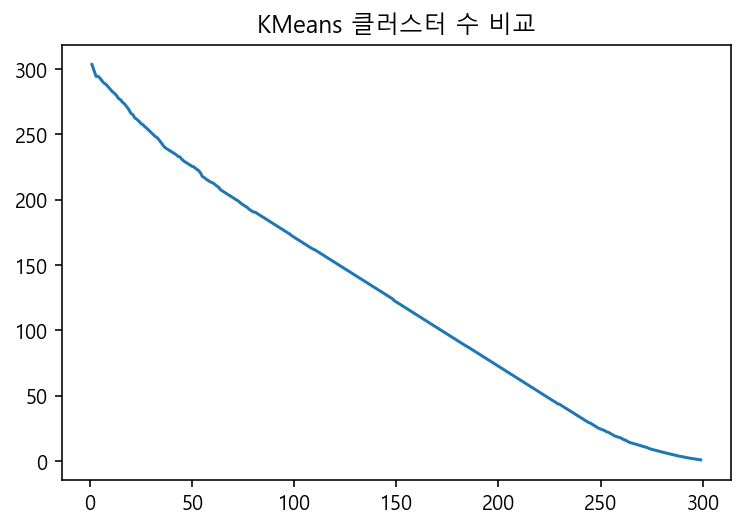

In [26]:
plt.plot(range(start, end), inertia)
plt.title("KMeans 클러스터 수 비교")

클러스터 숫자가 높아질 수록 군집화의 질이 높아지고 있다. 하지만 총 댓글의 수는 352개다. 군집화의 숫자를 150개로 셋팅하고 분석을 시작하겠다

In [27]:
n_clusters = 150
cls = KMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_tfidf)
prediction = cls.predict(feature_tfidf)
df["cluster"] = prediction

In [28]:
df["cluster"].value_counts().head(10)

3     146
9     5  
25    4  
22    3  
18    3  
58    3  
14    3  
12    3  
68    3  
13    3  
Name: cluster, dtype: int64

군집화된 결과를 보면 3번이 가장 많은 146번인 군집화된 그룹이지만 바로 다음 군집화된 그룹 숫자를 보면 5개 밖에 안된다. 그 다음은 4,3,3,... 이런경우 3번 군집화는 군집이 안된 그룹이다. 첫 10개의 댓글을 보자.

In [29]:
df.loc[df["cluster"] == 3, ["bcluster","cluster","내용"]].head(10)

C:\Users\munsu\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,bcluster,cluster,내용
1,NaN,3,"국가가 지원금을 민간병원에 줘서 운영하려고 한게 잘못이다. 외주 주려 하지말고, 국가가 직접 중증외상센터 같은 기관을 운영해야 한다."
6,NaN,3,이국종 교수는 중증외상센터 선구자이다.먼 훗날 외상센터가 자리잡으면 그의 공일것...딴사람 같으면 벌써 손들고말인인데 누군간 꼭 해야해서 자신을 희생하는거다...
7,NaN,3,이국종 교수님처럼 희생하는 분들의 노고를 아는 사회가 되었으면 좋겠습니다
8,NaN,3,결론은 국가와 경기도에서 외상 환자 치료비 해마다 60억원씩 보조해주었는데 보조해준 돈 안쓰고 병원 수익으로 남기려고 유희석 깡패 병원장이 이국종을 압박한 거였네.
9,NaN,3,병원장 자격 없는 유희석씨 때문에 휼륭한 의사 한분 대한민국 떠나게 되었네 유희석 병원장 100명 보다 이국종 교수 한분을 우린 원한다
13,NaN,3,이상하게 왜 개차반들이 기관장들을 많이 할까 ? 정직한 사람들은 항상 을이 되고
14,NaN,3,이런 분들도 저렇게 욕도 먹는구나. 우리나라는 정말 직장내 갑질이 고질적인 문제구만. 정말 심각하다.
16,NaN,3,국가가 직접 증중외상 센터를 만들어 운영하고 닥터헬기나 의료진을 보호하고 의료기술을 더 발전하도 의료 혁신 ‥개혁 해야
24,NaN,3,여러모로 맘고생 많이 하셨겠네요 .....
25,NaN,3,병원 경영을 생각 안 할 수 없는 원장 입장도 이해는 간다 그래도 배운 사람이고 존경받는 직업인데 좋게 말을 해야지 너무 충격적 폭언 아닌가? 이런 문제를 근본적으로 해결하려면 결국 나라가 대규모 국립 중증외상치료센터를 강원도나 충북 경북등 미개발 산간을 개발해서 하나 세우는 게 낫지 않나 싶다 주택지가 아니라 닥터헬기 소음 민원도 없을 테고 군과도 긴밀하게 협력 가능하고 이국종박사등 의료진들도 맘 편하고


응원하는 글이 대부분이지만 군집화된 단어를 찾아 볼 수 가 없다.

In [30]:
# batch_size 를 쓸 수 있는 MiniBatchKMeans 로 군집화/ KMeans 보다는 quality가 떨어지지만 
from sklearn.cluster import MiniBatchKMeans
b_inertia = []

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
for i in trange(start, end):
    cls = MiniBatchKMeans(n_clusters=i, random_state=42)
    cls.fit(feature_tfidf)
    b_inertia.append(cls.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████| 299/299 [01:48<00:00,  2.75it/s]


Text(0.5, 1.0, 'MiniBatchKMeans 클러스터 수 비교')

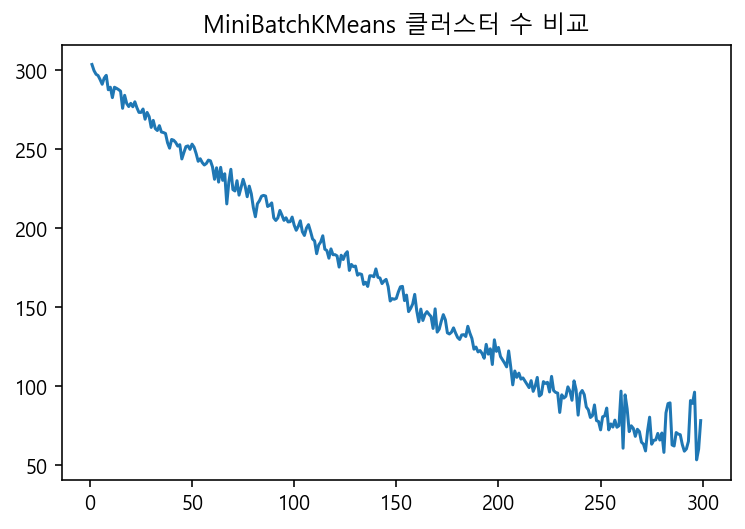

In [31]:
plt.plot(range(start, end), b_inertia)
plt.title("MiniBatchKMeans 클러스터 수 비교")

In [32]:
n_clusters = 150
cls = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_tfidf)
prediction = cls.predict(feature_tfidf)
df["bcluster"] = prediction

In [33]:
df["bcluster"].value_counts().head(10) #cluster = 150

2      86
14     52
41     12
40     7 
113    7 
110    6 
69     6 
32     3 
10     3 
39     3 
Name: bcluster, dtype: int64

In [34]:
df["cluster"].value_counts().head(10) #cluster = 150

3     146
9     5  
25    4  
22    3  
18    3  
58    3  
14    3  
12    3  
68    3  
13    3  
Name: cluster, dtype: int64

In [35]:
df.loc[df["cluster"] == 9, ["bcluster","cluster","내용"]]

,bcluster,cluster,내용
97,115,9,나이든사람이 나랑한판붙을래?ㅋㅋㅋ 무슨 얘들도아니고 ㅋㅋ 미치것다
163,61,9,성인지 페미예산 32조원에 비하면 60억 개푼돈 맞음 ㅋㅋ
318,61,9,의사면 그냥 슈바이처라도 되야하냐?ㅋㅋ 빨갱이냄새나네. 돈때문이지 무슨이유여야하나?.닌 살아숨쉴때마다 국가와국민을위해서 살고있나봐? 제도나 법적인 뭔가가 하자가있으니 시스템이 억지로 굴러가는거지 불협화음이 안나올 수 없다. 욕설하고 의도적으로 업무방해를한것은 비난받아 마땅하지만
335,101,9,이국종 본인이 고발안했는데 시민단체가 뭐라고 ㅋㅋ 아무튼 좌빨 시민단체 여론으로 적폐만들기 참 쉽죠잉 ㅋㅋ
340,61,9,인터뷰하눈데 수술모자는 왜 씀? ㅋㅋㅋㅋ겉멋만 들어서 ㅋㅋ


KMeans와 MiniBatchKmeans를 비교하자면 KMeans의 정확도가 더 높다.  
KMean의 9번 그룹의 군집화에서는 'ㅋㅋ'웃는 단어로 군집화가 돼었다. 이 5개의 댓글에서는 병원장과 이국종의사를 조롱하는 글과 정치적인 글이 있다.  

In [36]:
df.loc[df["cluster"] == 25, ["bcluster","cluster","내용"]]

,bcluster,cluster,내용
33,33,25,근데 모르는 시민단체가 왜 이리 많은지요. 사건 터지면 나오는 시민단체 이름들이 참 다양하네요
152,123,25,시민단체 할 지랄들 더럽게 없네 너네들이나 어디가서 욕하지 마라
192,123,25,고발주체 : ‘시민단체 서민민생대책위원회’..... ㅋㅋㅋ
198,105,25,시민단체 화이링


KMean의 25번 군집화는 가만히 있었던 이국종교수였는데 시민단체가 이 사건을 끄집어 내었다는 비판과 응원을 하고 있다.

In [37]:
df.loc[df["cluster"] == 22, ["bcluster","cluster","내용"]]

,bcluster,cluster,내용
102,42,22,사회에서 매장을 시키고...무인도로 보내라!
208,42,22,경증 퇴원 시키고 중증 받으세요
277,59,22,원장 사형 시키고 직계가족 추방 시켜라


KMean의 22번 군집화는 원장을 퇴진 요규를 동의하는 댓글을 쓰고 있다

In [52]:
df.loc[df["bcluster"] == 14, ["bcluster","cluster","내용"]]

,bcluster,cluster,내용
37,14,3,참 무식한 넘이다.이런넘이 원장이라니..아주병원 의사넘들 똑같아 보인다.
42,14,3,이국종교수때문에아주대병원이널리알려져서사업이잘되는것으로알고있는데지금은이국종교수가필요없나원장이막나가네나라와국민에게봉사를해야지요
52,14,3,이것도 좀 이상해...
91,14,3,국립의료원에서일하게합시다.아주대출장소 .운영은국립의료원에서하고
98,14,3,인간의생명을 구하는 최전선에서 일하는수고가 욕으로돌아왔네요 너무순둥해서. 가끔쓰레기가 구르면 한번씩치워주는것도필요해요 힘드셨겠네요
101,14,3,생긴대로노네 원장ㅡㅡ아주밥맛이야 저런인간들ㅜ돈 어디다 다쓴거여!!
105,14,3,이제야말로 새로운보수정당에서 이썩은나라를 뒤집어엎어봅시다교수님
107,14,3,병원장들의 실체다 대학병원 수익은 그전보다 무조건올려야하고 받아먹을건최대한받아먹어야하고 환자직업재산에 처방이틀려지는 ㅇㅇ당같은 놈들이딘
112,14,3,언어 폭력도 폭력입니다
120,14,3,인민재판?


minibathkmean(bcluster column)의 군집화는 다소 군집된 모습을 보여 주진 않는다. 하지만 대부분의 댓글이 이국종의사를 응원과 유희석병원장의 퇴진 요구에 동의하고 있다.  
가끔 보이는 답글에 이국종의사가 이재명 정치인을 응원하기 때문에 이국종의사가 싫다고 얘기하는 이용자들이 있다. 한번 찾아보자.

In [58]:
df_python = df[df["내용"].str.contains("재명")].copy()
df_python["내용"]

62     근데 이국종 저양반. 좌파 아닌가? 이재명이랑 되게 친하더만..이재명  믿고  겁도 없이 설치는건가?                                  
157    갠적 생각인데 이 문제는 이재명 지사가 나서줬으면 싶다.                                                           
268    이국종 교수. 이재명 지사는 닥터헬기 할애비를 지윈해도 칭찬해선 안될 사람이다                                               
291    이분 다 좋은데 !이재명은 아니죠?!!!                                                                    
305    이 국종이는 왜 이 재명을 만나가지고 의심이 들게하는고?정치인은 멀리하셔야 할텐데...                                          
314    이국종은 우리나라를 떠나라.MB가 그 자리를 만들어줬더만 배은망덕하게 이재명 구명이나 하고 인간이하의 짓을 하는 당신은 민족의 변절자다.당장 떠나라.       
317    이재명쪽과  손잡았다면 이국종 이 분도.. 그다지.. 부부의사, 책, 강연 등의 수입은 어디로 쓰시나요?                                
325    이재명같은 사람이랑 친하다니 실망!!!  사람은 다 거기서 거기 백지장 한장차이라더니?!  정치인과 엮이지 말고 의술에만 전념하십시요!  ~~~          
337    이국종 옳고 그른것을 떠나 언론몰이에 감성팔이가 전형적 좌파의 모습이라 청렴하고 외곯수라고 여겼던  모습과 안어울린다. 이재명과 같이 어울리더니 그렇게 변한건가.
341    얼마전에 이국종이 이재명 편드는 뉴스 나오더니만  그사람이 녹음해서 고발하는 법 가르쳐 줬나?                                      
Name: 내용, dtype: obj

1 개의 답글을 빼고는 나머지 9 개의 답글에는 이재명이랑 친분이 있기 때문에 이국종의사가 욕을 먹고 있다

# Word Cloud
마지막으로 Word Cloud를 통해 어떤 단어들이 많이 쓰여 졌는지 보기로 한다.

In [49]:
from wordcloud import WordCloud

# 불용어 - 자주 등장하지만 의미가 크지 않아 제외하고 싶은 텍스트
stopwords = ['교수님','하는','그냥','이국종교수님','병원','보면','저런']
# stopwords = []
def displayWordCloud(data = None, backgroundcolor = 'white', width=1280, height=768):
    wordcloud = WordCloud(
                        font_path = 'C:/Windows/WinSxS/amd64_microsoft-windows-f..uetype-malgungothic_31bf3856ad364e35_10.0.17763.1_none_f615c85d1e5326f1/malgun.ttf', 
                        stopwords = stopwords, 
                        background_color = backgroundcolor, 
                        width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

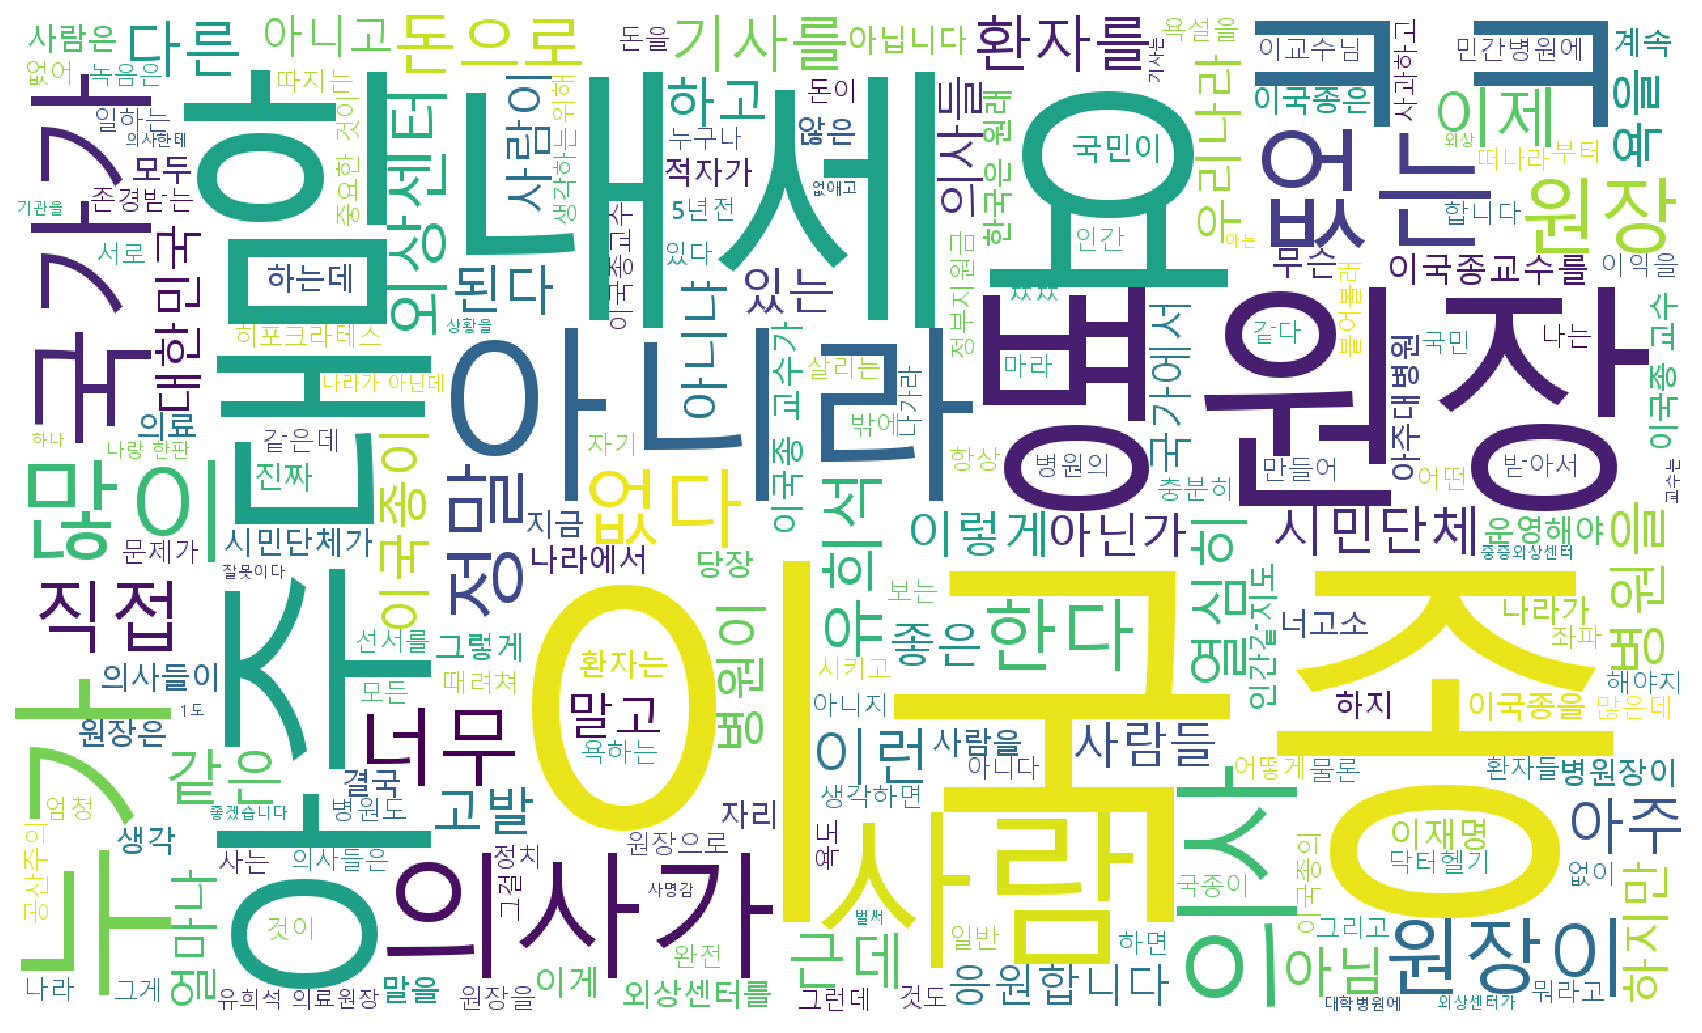

In [50]:
course_text = " ".join(df["내용"].fillna('remove'))
displayWordCloud(course_text)

워드 클라우드에서 ['교수님','하는','그냥','이국종교수님','병원','보면','저런'] 단어를 제외한 보이는 단어들은 이국종, 아주대, 병원장, ㅋㅋ, 국가가,의사, 돈으로, 등등이 보인다.
과연 이 '힘내세요'라는 단어가 누구를 힘내라 하는건지 찾아보고 분석을 마치겠다.

In [51]:
text = df.loc[(df["힘내세요"] == True), "내용"]
for t in text:
    print("-"*200)
    print(t)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
힘내세요 이교수님
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
우리나라 의사중 진심으로 환자를 위해서 치료하는 의사가 몇명이나 되겠어?환자를 다 돈으로 보고 수술하고 일하는거지!     *이국종교수님 힘내세요*
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
이국종교수님, 힘내세요, 국민들이 뒤에서 모두 응원합니다
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
힘내세요!!좌절 하지마세요!!
------------------------------------------------------

# 총 14개의 댓글이 이국종 교수님을 직접적인 '힘내세요' 단어로 응원하고 있다.